In [1]:
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()

In [3]:
path_to_root_file = '/Users/hzanoli/cernbox/postdoc/DHFeCorrLocal/data_root/'
configuration_name = 'D0'
folder_name = 'DHFeCorrelation_' + configuration_name

In [4]:
files = ['16d.root', '16e.root', '16g.root', '16h.root', '16j.root', '16k.root', '16l.root', '16o.root',
         '16p.root', '17c.root', '17e.root', '17f.root', '17h.root', '17i.root', '17j.root', '17k.root',
         '17l.root', '17m.root', '17o.root', '17r.root', '18b.root', '18d.root', '18e.root', '18f.root',
         '18g.root', '18h.root', '18i.root', '18k.root', '18l.root', '18m.root', '18n.root', '18o.root',
         '18p.root']

In [5]:
n_events_with_trigger = list()
n_events_with_DHFe = list()

for f in files:
    file_root = ROOT.TFile.Open(path_to_root_file+f)
    file_root.cd('DHFeCorrelation_D0')
    list_event_qa = ROOT.gDirectory.Get('EventsQA')
    
    events_with_trigger = list_event_qa.FindObject('VertexZ_before')
    events_with_trigger.GetXaxis().SetRangeUser(-10.,10.)
    n_events = events_with_trigger.Integral()
    n_events_with_trigger.append(n_events)
    
    events_with_DHFe = list_event_qa.FindObject('VertexZ_after')
    events_with_DHFe.GetXaxis().SetRangeUser(-10.,10.)
    n_events_DHFe = events_with_DHFe.Integral()
    n_events_with_DHFe.append(n_events_DHFe)

In [6]:
periods = [x[:-5] for x in files] 
event_counts = pd.DataFrame([periods, n_events_with_trigger, n_events_with_DHFe]).T
event_counts.columns = ['Period', 'Number of Events', 'Events with D and e']

In [7]:
event_counts['year'] = event_counts['Period'].apply(lambda x: x[:2])
event_counts['period'] = event_counts['Period'].apply(lambda x: x[2:3])
event_counts

,Period,Number of Events,Events with D and e,year,period
0,16d,1.53896e+07,189076,16,d
1,16e,5.06021e+07,665821,16,e
2,16g,2.7366e+07,342646,16,g
3,16h,7.1316e+07,915226,16,h
4,16j,4.59067e+07,598876,16,j
5,16k,1.19888e+08,1.5701e+06,16,k
6,16l,2.93315e+07,383091,16,l
7,16o,3.307e+07,430731,16,o
8,16p,2.04292e+07,265163,16,p
9,17c,9.26623e+06,129390,17,c


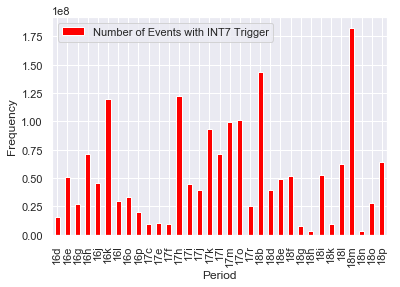

In [24]:
sns.set_context('notebook')
ax = event_counts.plot.bar(x='Period', y='Number of Events',
                           color='red', label='Number of Events with INT7 Trigger')
ax.set_ylabel('Frequency')

ax.get_figure().savefig('All_event_with_trigger.pdf', bbox_inches='tight')

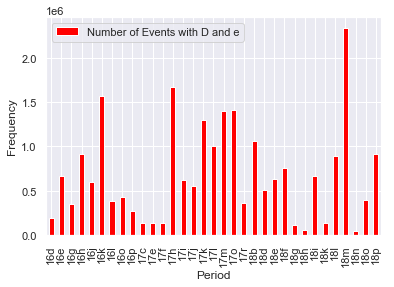

In [25]:
ax = event_counts.plot.bar(x='Period', y='Events with D and e', 
                           color='red', label='Number of Events with D and e')
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
ax.set_ylabel('Frequency')
ax.get_figure().savefig('All_event_with_De.pdf', bbox_inches='tight')

In [10]:
event_counts['Events with D and e'] = event_counts['Events with D and e'].astype(np.float32)
event_counts['Number of Events'] = event_counts['Number of Events'].astype(np.float32)
event_counts['ratio'] = event_counts['Events with D and e']/event_counts['Number of Events']

event_counts['ratio_error'] = event_counts['ratio']* np.sqrt( 
    (np.sqrt(event_counts['Events with D and e'])/event_counts['Events with D and e'])** 2  +
    (np.sqrt(event_counts['Number of Events'])/event_counts['Number of Events'])** 2)

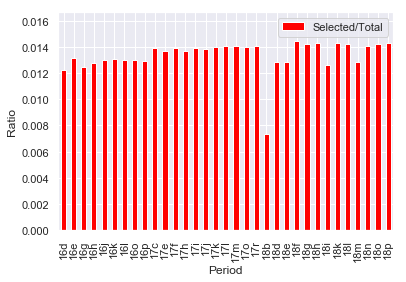

In [27]:
sns.set_context('notebook')
ax = event_counts.plot.bar(x='Period', y='ratio', color='red', label = 'Selected/Total')
ax.set_ylim(1.1*np.array(ax.get_ylim()))
ax.set_ylabel('Ratio')
ax.get_figure().savefig('ratio.pdf', bbox_inches='tight')

In [28]:
event_counts['Events with D and e'].sum()

22592798.0

In [29]:
event_counts['Number of Events'].sum()

1735948300.0